In [2]:
#Importing the neccessiary library into Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support
%matplotlib inline

df = pd.read_csv("/Users/ahmed/Downloads/healthcare-dataset-stroke-data.csv")
df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [3]:
df.shape
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# import label encoder library to deal with categorical data
from sklearn.preprocessing import LabelEncoder
#df['gender'] = df['gender'].replace(to_replace = ['Male'], value = 0)
df["gender"].replace(["Male", "Female", "Other"], [1, 0, 2], inplace=True)
df["ever_married"].replace(["Yes", "No"], [1, 0], inplace=True)
df["work_type"].replace(["children", "Never_worked", "Govt_job", "Private", "Self-employed"],[0, 1, 2, 3, 4], inplace=True)
#print(df["work_type"])
df["Residence_type"].replace(["Urban", "Rural"], [0, 1], inplace=True)
df["smoking_status"].replace(["formerly smoked", "never smoked", "smokes", "Unknown"], [0, 1, 2, 3],inplace=True)
#df['age'] = (df['age'] - df['age'].min()) / (df['age'].max() - df['age'].min())
#df['avg_glucose_level'] = (df['avg_glucose_level'] - df['avg_glucose_level'].min()) / (df['avg_glucose_level'].max() - df['avg_glucose_level'].min())
#df['hypertension'] = (df['hypertension'] - df['hypertension'].min()) / (df['hypertension'].max() - df['hypertension'].min())
#df['ever_married'] = (df['ever_married'] - df['ever_married'].min()) / (df['ever_married'].max() - df['ever_married'].min())
#df['work_type'] = (df['work_type'] - df['work_type'].min()) / (df['work_type'].max() - df['work_type'].min())
#df['heart_disease'] = (df['heart_disease'] - df['heart_disease'].min()) / (df['heart_disease'].max() - df['heart_disease'].min())
#df['smoking_status'] = (df['smoking_status'] - df['smoking_status'].min()) / (df['smoking_status'].max() - df['smoking_status'].min())
#df['Residence_type'] = (df['Residence_type'] - df['Residence_type'].min()) / (df['Residence_type'].max() - df['Residence_type'].min())
#df['gender'] = (df['gender'] - df['gender'].min()) / (df['gender'].max() - df['gender'].min())


print(df.isnull().sum())
median = df['bmi'].median()
df['bmi'] = df['bmi'].fillna(median)
#df['bmi'] = (df['bmi'] - df['bmi'].min()) / (df['bmi'].max() - df['bmi'].min())
print(df.isnull().sum())
# select all columns except the last one (the target label)
x=df.iloc[:,:-1]
# set target categorical data label (sixth attribute)
y=df.iloc[:,11]
print("this is the test")
print(y)

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
# import machine learning library to sample the data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
# import machine learning library to standardize the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit_transform(x_train,y_train)
sc.fit(x_test,y_test)

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64
id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
this is the test
0       1
1       1
2       1
3       1
4       1
       ..
5105    0
5106    0
5107    0
5108    0
5109    0
Name: stroke, Length: 5110, dtype: int64


StandardScaler()

In [5]:
print('-------- x axis test ----------')
print(x_test)
print('-------- x axis train ---------')
print(x_train)
print('-------- y axis test ----------')
print(y_test)
print('-------- y axis train ---------')
print(y_train)
print('*******************************')

-------- x axis test ----------
         id  gender   age  hypertension  heart_disease  ever_married  \
42    61960       1  82.0             0              1             1   
380   31741       1   4.0             0              0             0   
3524  59451       1  58.0             0              0             1   
352   40670       0  20.0             0              0             0   
4927  25391       0  10.0             0              0             0   
...     ...     ...   ...           ...            ...           ...   
929   36618       1  75.0             0              1             1   
2629  72915       0  45.0             0              0             1   
663   10997       0  38.0             0              0             1   
2303  20316       0  75.0             0              0             1   
3122  44375       0  57.0             1              0             1   

      work_type  Residence_type  avg_glucose_level   bmi  smoking_status  
42            3             

In [6]:
#from sklearn.model_selection import cross_val_score

# Instantiate the classifier
#gnb = GaussianNB()

# Perform k-fold cross validation
#scores = cross_val_score(gnb, x, y, cv=10)

# Print the mean and standard deviation of the scores
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Number of mislabeled points out of a total 1533 points : 129, performance 91.59%


Text(0.5, 25.722222222222214, 'Predicted label')

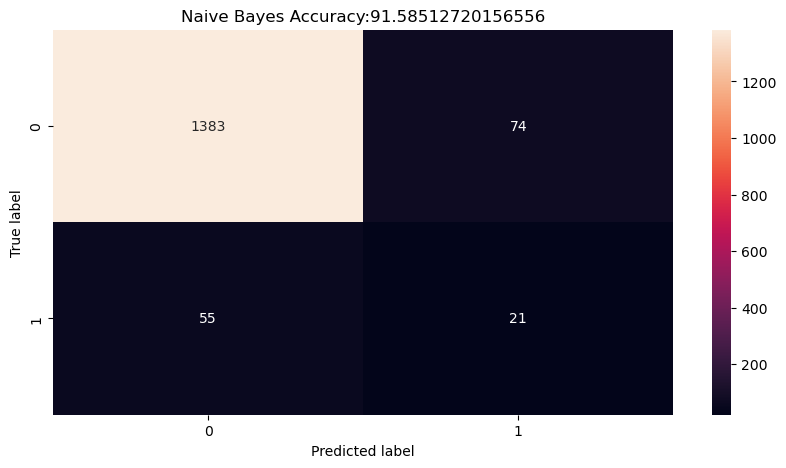

In [7]:
#Naive Bayes Implementation  
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
# Instantiate the classifier
gnb = GaussianNB()
#bnb = BernoulliNB()
#mnb = MultinomialNB()

# Train classifier
gnb.fit(x_train,y_train)
#bnb.fit(x_train,y_train)
#mnb.fit(x_train,y_train)

# Test the classifier
predict = gnb.predict(x_test)
#predict = bnb.predict(x_test)
#predict = mnb.predict(x_test)

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(x_test.shape[0], (y_test != predict).sum(), 
              gnb.score(x_test,y_test)*100 ))

# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['0','1'], 
                     columns = ['0','1'])
# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Naive Bayes Accuracy:" + str(gnb.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [8]:
#RBV SVM Implementation
from sklearn.svm import SVC
svc_rbf= SVC(C=1, kernel='rbf', gamma = 0.0001)
svc_rbf.fit(x_train, y_train)
yfit = svc_rbf.predict(x_test)

In [9]:
from sklearn.model_selection import GridSearchCV
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)

param_grid= {'C': [1, 2 ,3 , 5],
              'gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(svc_rbf, param_grid, verbose=1, n_jobs=-1)
grid.fit(x_train, y_train)

gridSVM=grid.best_params_
print(gridSVM)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
{'C': 1, 'gamma': 0.0001}


Fitting 5 folds for each of 16 candidates, totalling 80 fits


Text(0.5, 58.7222222222222, 'Predicted label')

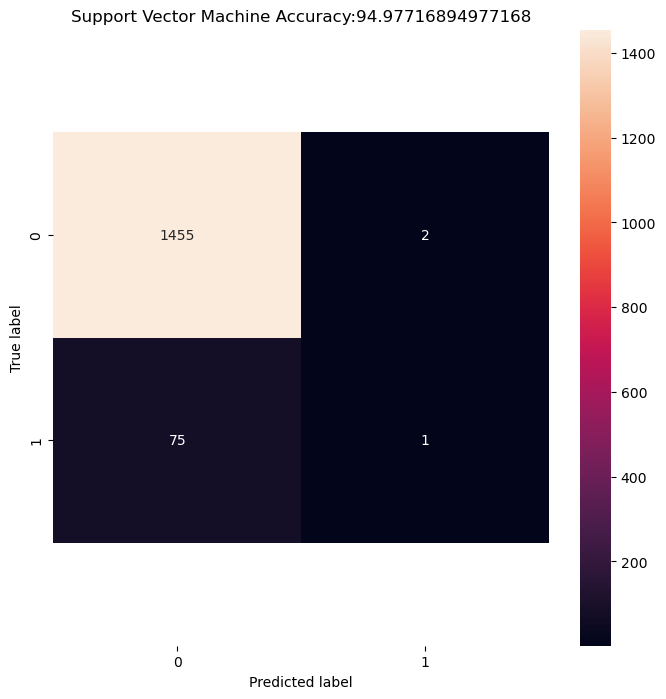

In [10]:
# import the confusion matrix
from sklearn.metrics import confusion_matrix

# compute the confusion matrix
cm = confusion_matrix(y_test, yfit)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['0','1'], 
                     columns = ['0','1'])

# plot the confusion matrix
plt.figure(figsize=(8,8))
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Support Vector Machine Accuracy:" + str(svc_rbf.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [11]:
#Resample the unbalanced data set
from sklearn.utils import resample


# determine the number of samples for each class
class_counts = df.groupby('stroke').size()

# determine the minimum number of samples among all classes
min_class_count = class_counts.min()

# create a new dataframe with an equal number of samples for each class
df_balanced = pd.DataFrame(columns=df.columns)
for class_label, count in class_counts.items():
    df_class = df[df['stroke'] == class_label]
    df_class_downsampled = resample(df_class, 
                                    replace=False, 
                                    n_samples=min_class_count, 
                                    random_state=0)
    df_balanced = pd.concat([df_balanced, df_class_downsampled])

In [12]:
# assigning the balanced data set to our training set
df = df_balanced
x=df.iloc[:,:-1]
# set target categorical data label (sixth attribute)
y=df.iloc[:,11]
print("this is the test")
print(y)

labelencoder = LabelEncoder()
y = labelencoder.fit_transform(y)
# import machine learning library to sample the data
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
# import machine learning library to standardize the data
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
sc.fit_transform(x_train,y_train)
sc.fit(x_test,y_test)

this is the test
560     0
403     0
2276    0
1936    0
1768    0
       ..
67      1
192     1
117     1
47      1
172     1
Name: stroke, Length: 498, dtype: object


StandardScaler()

In [13]:
#Chcecking whether the data becomed balanced or not 
df_balanced['stroke'].value_counts()


0    249
1    249
Name: stroke, dtype: int64

Number of mislabeled points out of a total 150 points : 33, performance 78.00%


Text(0.5, 25.722222222222214, 'Predicted label')

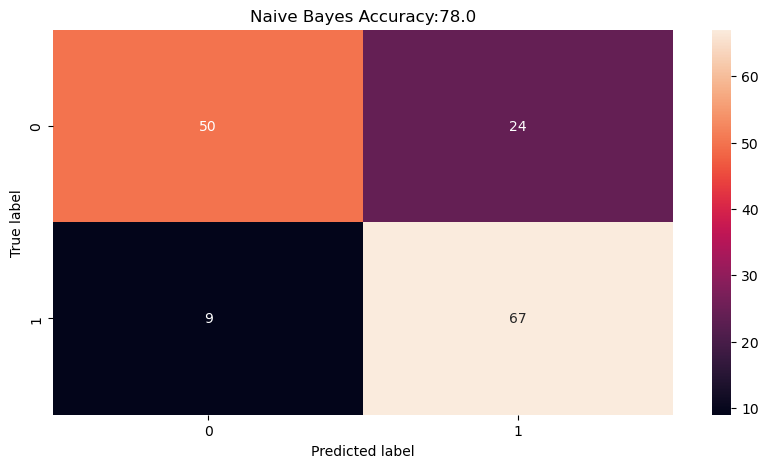

In [14]:
#Performin the naive Bayes on balnced data set
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
# Instantiate the classifier
gnb = GaussianNB()
#bnb = BernoulliNB()
#mnb = MultinomialNB()

# Train classifier
gnb.fit(x_train,y_train)
#bnb.fit(x_train,y_train)
#mnb.fit(x_train,y_train)

# Test the classifier
predict = gnb.predict(x_test)
#predict = bnb.predict(x_test)
#predict = mnb.predict(x_test)

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(x_test.shape[0], (y_test != predict).sum(), 
              gnb.score(x_test,y_test)*100 ))

# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['0','1'], 
                     columns = ['0','1'])
# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Naive Bayes Accuracy:" + str(gnb.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [15]:
#performing RBF on balnced dataset
svc_rbf= SVC(C=1, kernel='rbf', gamma = 0.0001)
svc_rbf.fit(x_train, y_train)
yfit = svc_rbf.predict(x_test)

Text(0.5, 58.7222222222222, 'Predicted label')

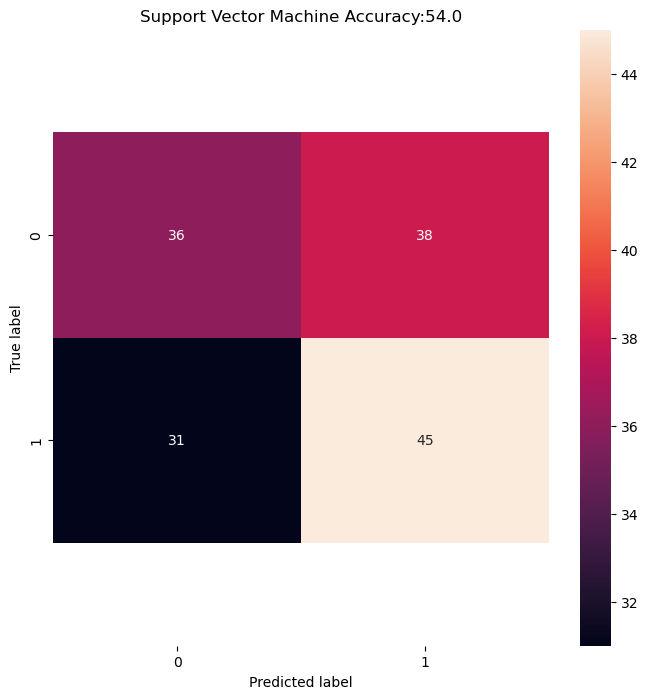

In [16]:
# showing the result of RBF model
# import the confusion matrix
from sklearn.metrics import confusion_matrix

# compute the confusion matrix
cm = confusion_matrix(y_test, yfit)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['0','1'], 
                     columns = ['0','1'])

# plot the confusion matrix
plt.figure(figsize=(8,8))
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Support Vector Machine Accuracy:" + str(svc_rbf.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [17]:
#Choosing the best features for our model using F_score method
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func = f_classif, k = 6)
#New dataframe with the selected features for later use in the classifier. fit() method works too, if you want only the feature names and their corresponding scores
X_new = selector.fit_transform(x_train, y_train)
names = x_train.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

          Feat_names    F_Scores
0                age  195.245105
3       ever_married   32.307129
4          work_type   27.917520
1       hypertension   24.128139
5  avg_glucose_level   17.444857
2      heart_disease   11.467345


In [19]:
#keeping only the selected features and remove the rest
x_train= x_train[['age', 'ever_married', 'work_type', 'hypertension', 'avg_glucose_level', 'heart_disease']]
#y_train=y_train[['age', 'ever_married', 'work_type', 'hypertension', 'avg_glucose_level', 'heart_disease','smoking_status']]
x_test=x_test[['age', 'ever_married', 'work_type', 'hypertension', 'avg_glucose_level',  'heart_disease']]
#y_test=y_test[['age', 'ever_married', 'work_type', 'hypertension', 'avg_glucose_level',  'heart_disease','smoking_status']]

Number of mislabeled points out of a total 150 points : 32, performance 78.67%


Text(0.5, 25.722222222222214, 'Predicted label')

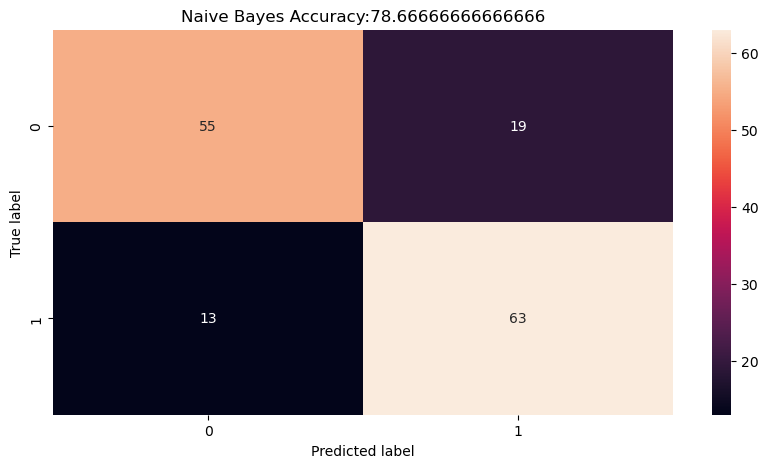

In [20]:
# performing naive bayes on the selected feature
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
# Instantiate the classifier
gnb = GaussianNB()
#bnb = BernoulliNB()
#mnb = MultinomialNB()
# Train classifier
gnb.fit(x_train,y_train)
#bnb.fit(x_train,y_train)
#mnb.fit(x_train,y_train)

# Test the classifier
predict = gnb.predict(x_test)
#predict = bnb.predict(x_test)
#predict = mnb.predict(x_test)

# Print results
print("Number of mislabeled points out of a total {} points : {}, performance {:05.2f}%"
      .format(x_test.shape[0], (y_test != predict).sum(), 
              gnb.score(x_test,y_test)*100 ))

# Creates a confusion matrix
cm = confusion_matrix(y_test, predict)

# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['0','1'], 
                     columns = ['0','1'])
# plot the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title("Naive Bayes Accuracy:" + str(gnb.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [21]:
#perform the RBF on the selected feature
svc_rbf= SVC(C=1, kernel='rbf', gamma = 0.0001)
svc_rbf.fit(x_train, y_train)
yfit = svc_rbf.predict(x_test)

Text(0.5, 58.7222222222222, 'Predicted label')

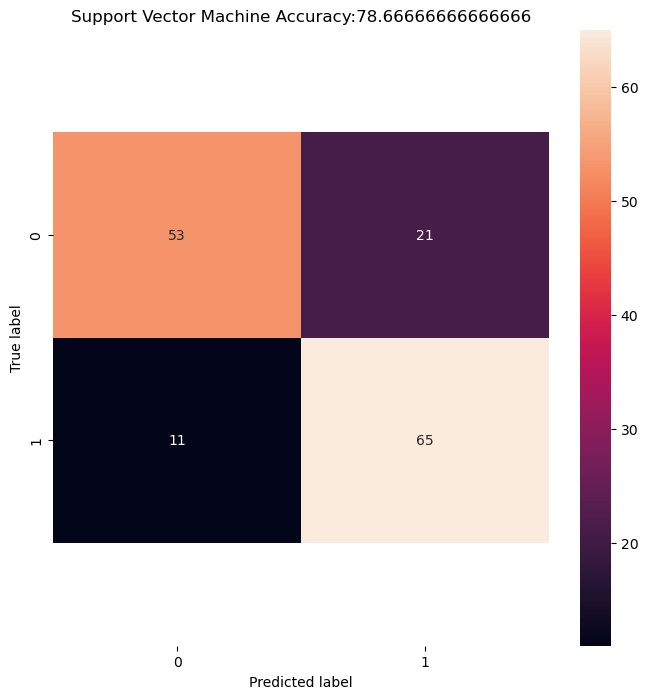

In [22]:
# showing the result of the RBF
from sklearn.metrics import confusion_matrix

# compute the confusion matrix
cm = confusion_matrix(y_test, yfit)
# Transform to dataframe for easier plotting
cm_df = pd.DataFrame(cm, index = ['0','1'], 
                     columns = ['0','1'])

# plot the confusion matrix
plt.figure(figsize=(8,8))
ax= sns.heatmap(cm_df, annot=True, fmt='g')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title("Support Vector Machine Accuracy:" + str(svc_rbf.score(x_test,y_test)*100))
plt.ylabel('True label')
plt.xlabel('Predicted label')